In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

from pandas.io.data import DataReader
from __future__ import division

/usr/local/lib/python2.7/dist-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB', 'NFLX', 'LNVGY', 'RHT']

In [3]:
end = datetime.now()
start = datetime(end.year-5, end.month, end.day)

AttributeError: 'module' object has no attribute 'now'

In [23]:
start = datetime.datetime.strptime('May 18 2015', '%b %d %Y')
end = start + datetime.timedelta(days=90)
FB = DataReader('AMZN', 'yahoo', start)

In [22]:
for stock in tech_list:
    globals()[stock] = DataReader(tech_list, 'yahoo', start, end)

In [24]:
FB.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-05-18,426.000000,427.269989,421.459991,425.239990,2390200,425.239990
2015-05-19,424.869995,428.239990,420.630005,421.709991,2464200,421.709991
2015-05-20,420.600006,427.100006,418.359985,423.859985,2196200,423.859985
2015-05-21,428.000000,436.899994,428.000000,431.630005,4121400,431.630005
2015-05-22,431.549988,432.440002,427.609985,427.630005,2020600,427.630005


In [25]:
df = FB.describe()

In [26]:
df

,Open,High,Low,Close,Volume,Adj Close
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,547.605386,553.738702,540.040962,547.087982,4353742.788462,547.087982
std,79.562904,80.264896,77.921978,79.221297,2337205.126188,79.221297
min,420.600006,426.799988,418.359985,421.709991,1091200.000000,421.709991
25%,491.735008,503.502502,485.274994,493.472504,2893750.000000,493.472504
50%,538.945007,542.820007,529.815002,536.510010,3926400.000000,536.510010
75%,613.779983,620.107483,600.230011,609.209991,4932300.000000,609.209991
max,691.890015,696.440002,686.380005,693.969971,21909400.000000,693.969971


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-02-04 to 2016-02-03
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [7]:
RT['Adj Close'].plot(legend=True, figsize=(10,4))

NameError: name 'RT' is not defined

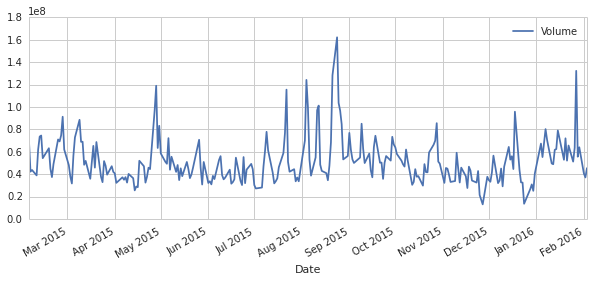

In [9]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [10]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = 'MA for %s days' % str(ma)
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)

In [11]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2015-02-04,118.500000,120.510002,118.309998,119.559998,70149700,117.557021,NaN,NaN,NaN
2015-02-05,120.019997,120.230003,119.250000,119.940002,42246200,118.396080,NaN,NaN,NaN
2015-02-06,120.019997,120.250000,118.449997,118.930000,43706600,117.399079,NaN,NaN,NaN
2015-02-09,118.550003,119.839996,118.430000,119.720001,38889800,118.178911,NaN,NaN,NaN
2015-02-10,120.169998,122.150002,120.160004,122.019997,62008500,120.449299,NaN,NaN,NaN


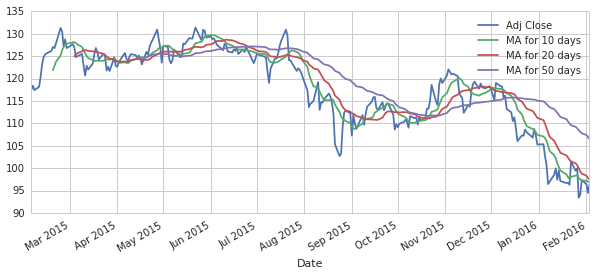

In [12]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

In [13]:
AAPL['Daily return'] = AAPL['Adj Close'].pct_change()

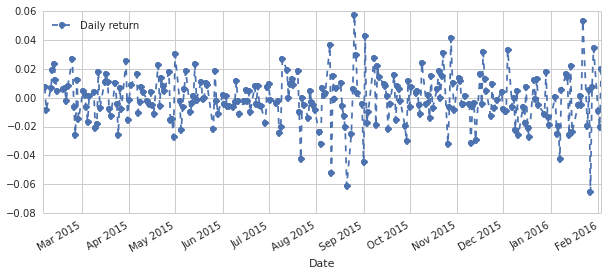

In [14]:
AAPL['Daily return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

In [109]:
sns.distplot(AAPL['Daily return'].dropna(), bins=100, color='purple')

KeyError: 'Daily return'

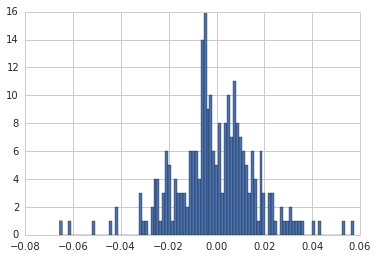

In [16]:
AAPL['Daily return'].hist(bins=100)

In [9]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [10]:
closing_df.head()

,AAPL,AMZN,FB,GOOG,LNVGY,MSFT,NFLX,RHT
Date,,,,,,,,
2011-03-15,45.699859,165.080002,NaN,284.495984,9.489611,22.093896,31.015715,40.110001
2011-03-16,43.659819,164.699997,NaN,278.272207,9.311234,21.571788,30.548571,39.580002
2011-03-17,44.272359,160.970001,NaN,280.400077,8.981238,21.563086,30.557142,39.290001
2011-03-18,43.747135,161.820007,NaN,280.250221,8.990157,21.580489,29.914286,39.110001
2011-03-21,44.888870,164.520004,NaN,287.962543,9.525286,22.041685,30.405714,39.810001


In [11]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,FB,GOOG,LNVGY,MSFT,NFLX,RHT
Date,,,,,,,,
2011-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-16,-0.044640,-0.002302,NaN,-0.021877,-0.018797,-0.023631,-0.015062,-0.013214
2011-03-17,0.014030,-0.022647,NaN,0.007647,-0.035441,-0.000403,0.000281,-0.007327
2011-03-18,-0.011863,0.005281,NaN,-0.000534,0.000993,0.000807,-0.021038,-0.004581
2011-03-21,0.026099,0.016685,NaN,0.027519,0.059524,0.021371,0.016428,0.017898


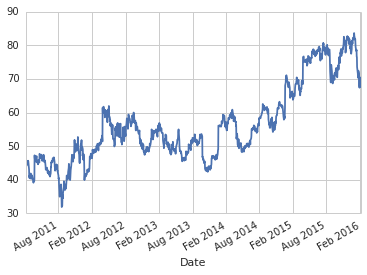

In [114]:
closing_df['RHT'].plot()

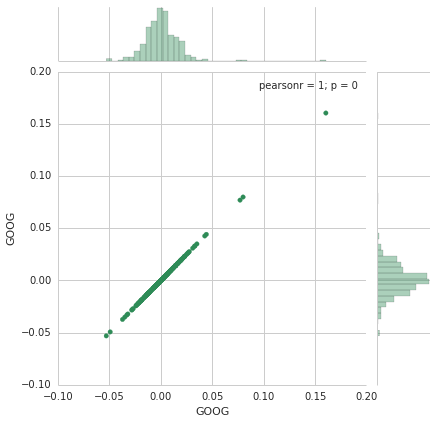

In [38]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

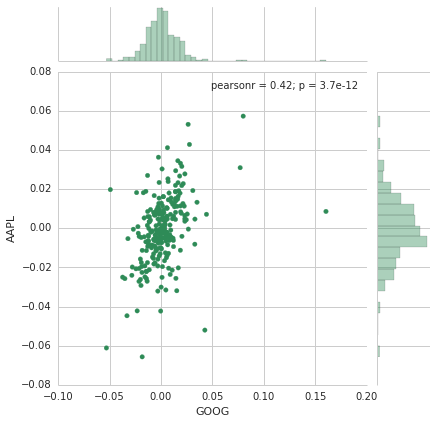

In [22]:
sns.jointplot('GOOG', 'AAPL', tech_rets, kind='scatter', color='seagreen')


In [12]:
tech_rets.head()

,AAPL,AMZN,FB,GOOG,LNVGY,MSFT,NFLX,RHT
Date,,,,,,,,
2011-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-16,-0.044640,-0.002302,NaN,-0.021877,-0.018797,-0.023631,-0.015062,-0.013214
2011-03-17,0.014030,-0.022647,NaN,0.007647,-0.035441,-0.000403,0.000281,-0.007327
2011-03-18,-0.011863,0.005281,NaN,-0.000534,0.000993,0.000807,-0.021038,-0.004581
2011-03-21,0.026099,0.016685,NaN,0.027519,0.059524,0.021371,0.016428,0.017898


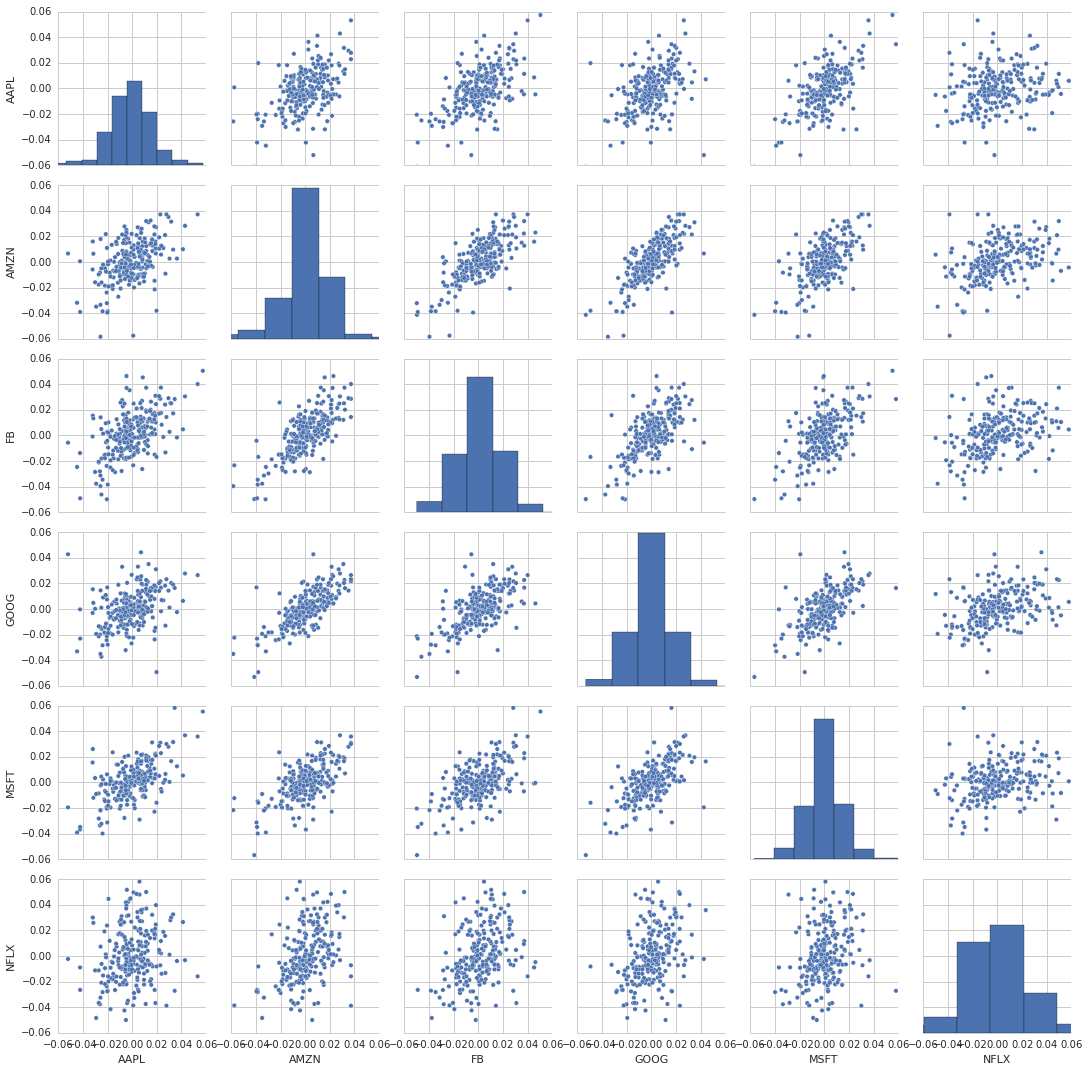

In [75]:
sns.pairplot(tech_rets.dropna())

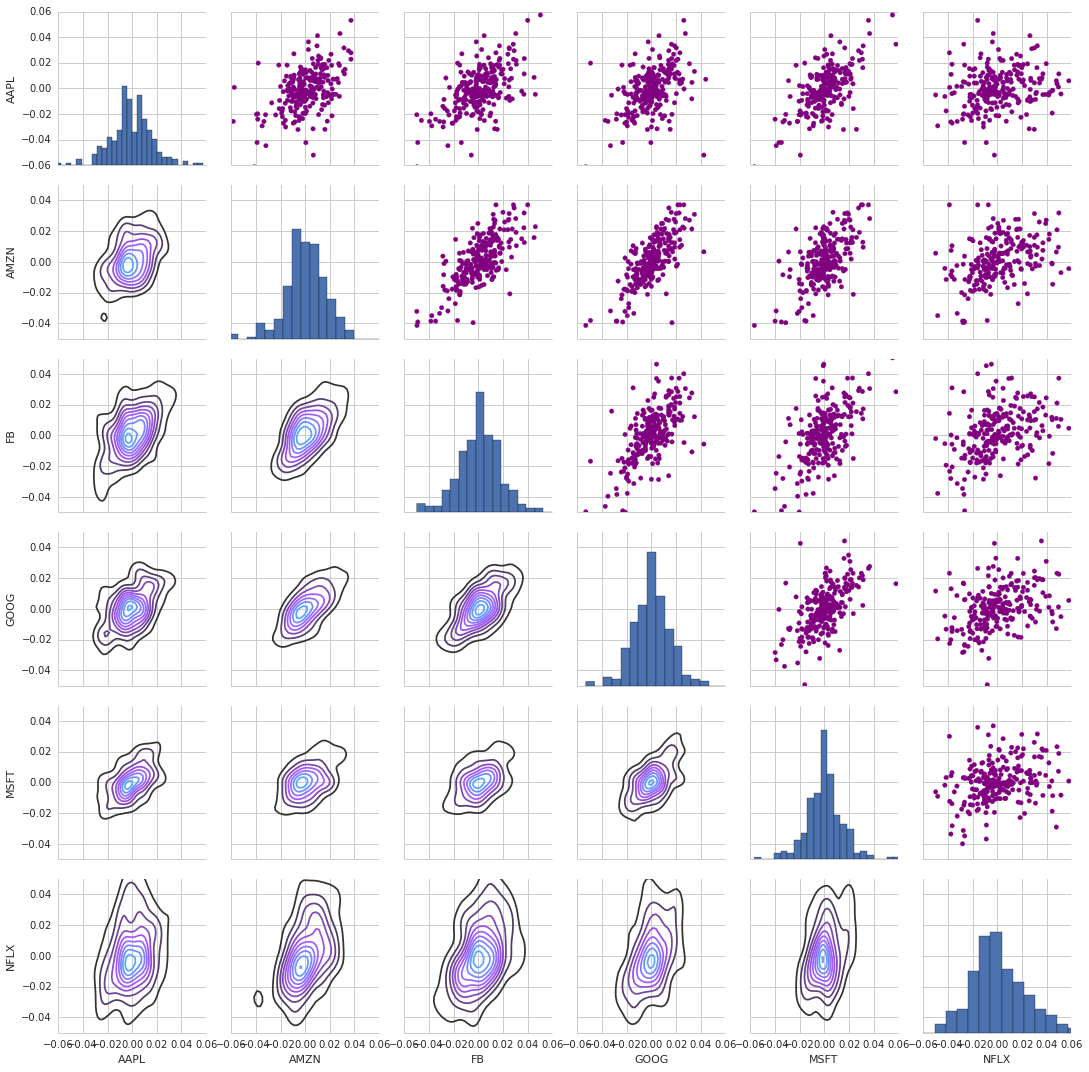

In [76]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

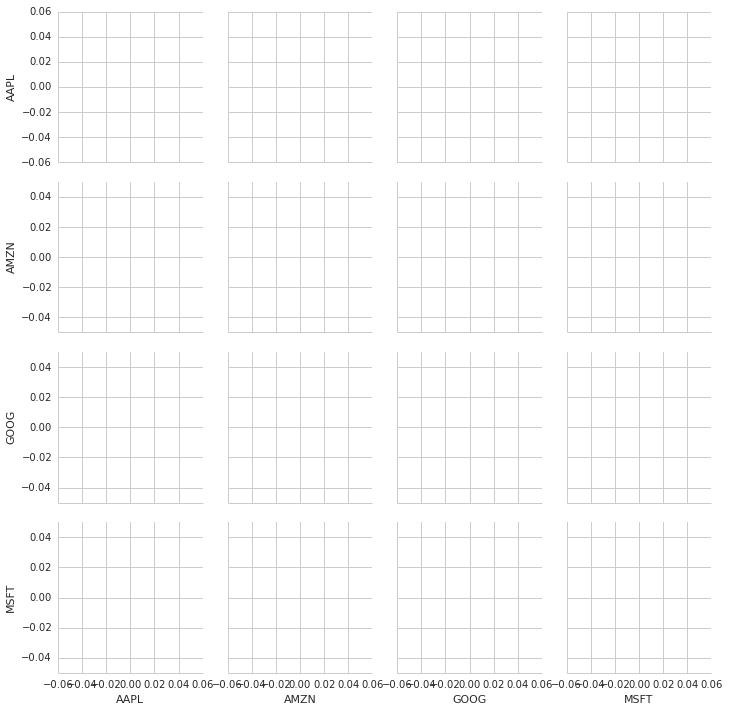

In [27]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist)

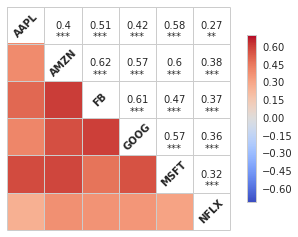

In [77]:
sns.corrplot(tech_rets.dropna(), annot=True)

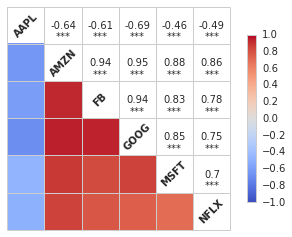

In [78]:
sns.corrplot(closing_df, annot=True)

In [16]:
rets = tech_rets[['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB', 'NFLX', 'LNVGY', 'RHT']].dropna()
# tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB', 'NFLX', 'LNVGY', 'RHT']

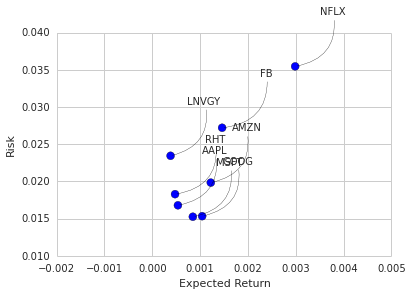

In [17]:
area = np.pi * 20
plt.scatter(rets.mean(), rets.std(), s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.5'))

In [119]:
rets.quantile(.05)

FB     -0.028614
AMZN   -0.029976
GOOG   -0.022446
RHT    -0.025305
dtype: float64

In [18]:
days = 90

dt = 1 / days

mu = rets.mean()['RHT']

sigma = rets.std()['RHT']

In [19]:
def stock_monte_carlo(start_price, days, mu, sigma, dt):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu *dt
        
        price[x] = price[x-1] + price[x-1] * (drift[x] + shock[x])
        
    return price

In [88]:
closing_df.head()

,AAPL,AMZN,FB,GOOG,MSFT,NFLX
Date,,,,,,
2015-02-04,117.557021,364.750000,75.629997,522.762349,40.731148,64.101425
2015-02-05,118.396080,373.890015,75.610001,527.582391,41.324983,64.129997
2015-02-06,117.399079,374.279999,74.470001,531.002415,41.286042,63.480000
2015-02-09,118.178911,370.559998,74.440002,527.832406,41.237368,63.295715
2015-02-10,120.449299,373.000000,75.190002,536.942412,41.471005,64.849998


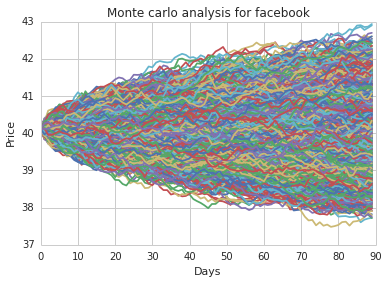

In [20]:
start_price = closing_df.RHT[0]

for run in xrange(10000):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma, dt))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte carlo analysis for facebook')

In [123]:
runs = 10000
simulations = np.zeros(runs)
for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma, dt)[days -1]

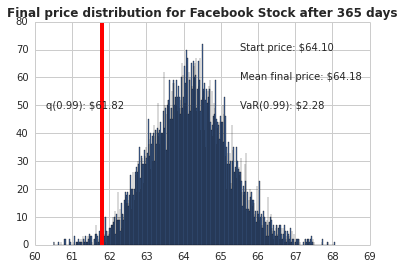

In [124]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=500)
# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Facebook Stock after %s days" % days, weight='bold');